# INTRO

In [ ]:
# Import os to define path and use legacy keras to avoid error on training
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [ ]:
# Defining filepath to make it easier to read
_FOLDER_DATASET_ = 'dataset'
_FILE_DATASET_ = 'data.zip'
_NAMA_MODEL_ = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
_LINK_DATASET_ = '1Y3Y4oxHXJw-o_0JIqFOPjDYIjC3G2wgu'
_LINK_PT_MODEL_ = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [ ]:
# Defining filepath to make it easier to read
objd_paths = {
    'TF_PATH' : os.path.join('Tensorflow'),
    'TFAPIMODEL_PATH' : os.path.join('Tensorflow', 'models'),
    'CHECKPOINT_PATH' : os.path.join('Tensorflow',_NAMA_MODEL_, 'checkpoint', 'ckpt-0'),
    'DATASET_PATH' : os.path.join('Tensorflow', 'models', 'dataset'),
    'MODELDIR_PATH' : os.path.join('Tensorflow','trained')
}

In [ ]:
# Defining filepath to make it easier to read
objd_files = {
    'OLDPIPE_PATH' : os.path.join('Tensorflow', _NAMA_MODEL_, 'pipeline.config'),
    'PIPELINE_PATH' : os.path.join('Tensorflow', 'models', 'pipeline.config'),
    'LABELMAPTRAIN_PATH' : os.path.join('Tensorflow', 'models', _FOLDER_DATASET_, 'train', 'skin_label_map.pbtxt'),
    'LABELMAPTEST_PATH' : os.path.join('Tensorflow', 'models', _FOLDER_DATASET_, 'test', 'skin_label_map.pbtxt'),
    'TFRECORDTRAIN_PATH' : os.path.join('Tensorflow', 'models', _FOLDER_DATASET_, 'train', 'skin.tfrecord'),
    'TFRECORDTEST_PATH' : os.path.join('Tensorflow', 'models', _FOLDER_DATASET_, 'test', 'skin.tfrecord'),
    'DECODERPY_PATH' : os.path.join('tfexample_decoder.py')
}

In [ ]:
# Clone TFOD
!git clone --q https://github.com/tensorflow/models.git {objd_paths['TFAPIMODEL_PATH']}

# Download dataset & unzip dataset

In [ ]:
# Download the dataset on google drive
!gdown 1wbA6eDla-92MTMVtJiZfl8OuR8SsNjAx

Downloading...
From (original): https://drive.google.com/uc?id=1wbA6eDla-92MTMVtJiZfl8OuR8SsNjAx
From (redirected): https://drive.google.com/uc?id=1wbA6eDla-92MTMVtJiZfl8OuR8SsNjAx&confirm=t&uuid=c67e8af1-8fef-4143-8bba-2e8283c59626
To: /content/data.zip
100% 124M/124M [00:01<00:00, 87.9MB/s]


In [ ]:
# Unzip the dataset on the dataset path
!unzip {_FILE_DATASET_} -d {objd_paths['DATASET_PATH']}

Archive:  data.zip
  inflating: Tensorflow/models/dataset/README.roboflow.txt  
   creating: Tensorflow/models/dataset/test/
 extracting: Tensorflow/models/dataset/test/skin.tfrecord  
  inflating: Tensorflow/models/dataset/test/skin_label_map.pbtxt  
   creating: Tensorflow/models/dataset/train/
 extracting: Tensorflow/models/dataset/train/skin.tfrecord  
  inflating: Tensorflow/models/dataset/train/skin_label_map.pbtxt  
   creating: Tensorflow/models/dataset/valid/
 extracting: Tensorflow/models/dataset/valid/skin.tfrecord  
  inflating: Tensorflow/models/dataset/valid/skin_label_map.pbtxt  


# Download Pre Trained Model

In [ ]:
# Download the ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!wget {_LINK_PT_MODEL_}

--2024-06-21 06:21:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M   109MB/s    in 0.2s    

2024-06-21 06:21:14 (109 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
# Unzip the downloaded model
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C {objd_paths['TF_PATH']}

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Install TFOD & Reinstall Tensorflow

In [ ]:
# Install protobuf-compiler and TFOD API
!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
protobuf-compiler is already the newest version (3.12.4-1ubuntu7.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Processing /content/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Change the tensorflow version to 2.15.0 to avoid error when training
!pip uninstall tensorflow --y
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
ERROR: pip's dependency resolver does not currently take into account 

In [ ]:
# Check the tensorflow version
import tensorflow as tf
tf.version.VERSION

'2.15.0'

In [ ]:
# Validate the TFOD installation
!python /content/Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py

2024-06-21 06:23:55.762794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 06:23:55.762857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 06:23:55.764176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 06:23:56.985779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-06-21 06:24:05.637928: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting beca

# Setting Pipeline Config

In [ ]:
# Copy the pipeline.config to a new path
!cp {objd_files['OLDPIPE_PATH']} {objd_paths['TFAPIMODEL_PATH']}

In [ ]:
# Import required modules to setup the pipeline
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

# Read and parse the pipeline config
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(objd_files['PIPELINE_PATH'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

# Customize pipeline
num_classes = 4
batch_size = 32

pipeline_config.model.ssd.num_classes = num_classes
pipeline_config.train_config.batch_size = batch_size
pipeline_config.train_config.fine_tune_checkpoint = objd_paths['CHECKPOINT_PATH']
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= objd_files['LABELMAPTRAIN_PATH']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [objd_files['TFRECORDTRAIN_PATH']]
pipeline_config.eval_input_reader[0].label_map_path = objd_files['LABELMAPTEST_PATH']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [objd_files['TFRECORDTEST_PATH']]

# Write the new pipeline
with tf.io.gfile.GFile(objd_files['PIPELINE_PATH'], "w") as f:
    f.write(text_format.MessageToString(pipeline_config))

In [ ]:
# Read and check if the pipeline is correctly changed
config = config_util.get_configs_from_pipeline_file(objd_files['PIPELINE_PATH'])
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

# Train Model

In [ ]:
# Download decoder
!gdown 13U92ZqrVj--RKTs6rG8uuy1Y9T3kCa1y

Downloading...
From (original): https://drive.google.com/uc?id=13U92ZqrVj--RKTs6rG8uuy1Y9T3kCa1y
From (redirected): https://drive.google.com/uc?id=13U92ZqrVj--RKTs6rG8uuy1Y9T3kCa1y&confirm=t&uuid=fba3a04c-7ec7-4e00-b021-606cfdfa96dd
To: /content/tfexample_decoder.py
100% 30.6k/30.6k [00:00<00:00, 69.7MB/s]


In [ ]:
# Remove existing decoder
!rm /usr/local/lib/python3.10/dist-packages/tf_slim/data/tfexample_decoder.py

In [ ]:
# Copy the new decoder
!cp {objd_files['DECODERPY_PATH']} /usr/local/lib/python3.10/dist-packages/tf_slim/data

In [ ]:
# Create the script to run the model
TRAINING_SCRIPT = os.path.join(objd_paths['TFAPIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
# Set up the required command to run the model
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, objd_paths['MODELDIR_PATH'], objd_files['PIPELINE_PATH'])

In [ ]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/trained --pipeline_config_path=Tensorflow/models/pipeline.config --num_train_steps=5000


In [ ]:
# Train the model
!{command}

2024-06-17 12:23:34.947317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 12:23:34.947372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 12:23:34.948845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 12:23:35.969530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-17 12:23:40.029251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using Mir

In [ ]:
# Zip the checkpoint
!zip -r /content/trained.zip {objd_paths['MODELDIR_PATH']}

  adding: Tensorflow/trained/ (stored 0%)
  adding: Tensorflow/trained/ckpt-7.index (deflated 82%)
  adding: Tensorflow/trained/ckpt-5.index (deflated 82%)
  adding: Tensorflow/trained/ckpt-6.index (deflated 82%)
  adding: Tensorflow/trained/train/ (stored 0%)
  adding: Tensorflow/trained/train/events.out.tfevents.1718627034.5dacc9463ca6.23789.0.v2 (deflated 0%)
  adding: Tensorflow/trained/ckpt-9.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-10.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-11.index (deflated 82%)
  adding: Tensorflow/trained/ckpt-7.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-6.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-8.index (deflated 82%)
  adding: Tensorflow/trained/ckpt-5.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-11.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/trained/ckpt-10.index (deflated 82%)
  adding: Tensorflow/trained/ckpt-8.data

In [ ]:
# Download the checkpoint
from google.colab import files
files.download("/content/trained.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Delete the checkpoint
!rm -rf {objd_paths['MODELDIR_PATH']}

# EVALUASI MODEL

In [ ]:
# Set up the required command to run the model
command_eval = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, objd_paths['TFAPIMODEL_PATH'],objd_files['PIPELINE_PATH'], '/content/Tensorflow/trained')

In [ ]:
print(command_eval)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/models --pipeline_config_path=Tensorflow/models/pipeline.config --checkpoint_dir=/content/Tensorflow/trained


In [ ]:
# Run validation
!{command_eval}

2024-06-17 13:40:32.256495: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 13:40:32.256546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 13:40:32.258038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 13:40:33.347925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
W0617 13:40:36.160646 137176593117824 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0617 13:40:36.160887 137176593117824 config_util.py:55

# Load Checkpoint

In [ ]:
!gdown 1vO78ICvUnRGtz5e3kH5o-LrsompwtVmw

Downloading...
From (original): https://drive.google.com/uc?id=1vO78ICvUnRGtz5e3kH5o-LrsompwtVmw
From (redirected): https://drive.google.com/uc?id=1vO78ICvUnRGtz5e3kH5o-LrsompwtVmw&confirm=t&uuid=8ba63c19-f4e6-4eee-8d80-3df168a8f118
To: /content/4_Class_081_Aug.zip
100% 131M/131M [00:02<00:00, 45.2MB/s]


In [ ]:
!gdown 1Dpojc9tx85_3h1_XMvxczXFRuBi9GnOe

Downloading...
From (original): https://drive.google.com/uc?id=1Dpojc9tx85_3h1_XMvxczXFRuBi9GnOe
From (redirected): https://drive.google.com/uc?id=1Dpojc9tx85_3h1_XMvxczXFRuBi9GnOe&confirm=t&uuid=069d522d-cf4d-4614-9897-53b36b1b1a0d
To: /content/5_Class_051.zip
100% 122M/122M [00:02<00:00, 46.8MB/s]


In [ ]:
!unzip /content/4_Class_081_Aug.zip -d {objd_paths['TF_PATH']}

Archive:  /content/4_Class_081_Aug.zip
   creating: Tensorflow/4_Class_081_Aug/
  inflating: Tensorflow/4_Class_081_Aug/checkpoint  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-1.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-1.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-2.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-2.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-3.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-3.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-4.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-4.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-5.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-5.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-6.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-6.index  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-7.data-00000-of-00001  
  inflating: Tensorflow/4_Class_081_Aug/ckpt-7.index  

In [ ]:
_CPOINT_PATH_ = '/content/Tensorflow/4_Class_081_Aug'

In [ ]:
# Import required modules to visualize the result
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(objd_files['PIPELINE_PATH'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(_CPOINT_PATH_, 'ckpt-7')).expect_partial()

# Made a function to preprocess, predict, and postprocess
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Test Model

In [ ]:
# Import required libraries to test the model
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Create a dictionary to maps class IDS to category name
category_index = label_map_util.create_category_index_from_labelmap(objd_files['LABELMAPTEST_PATH'])

In [ ]:
# Image path used for the test
_IMAGE_PATH_ = '/content/test3.jpg'

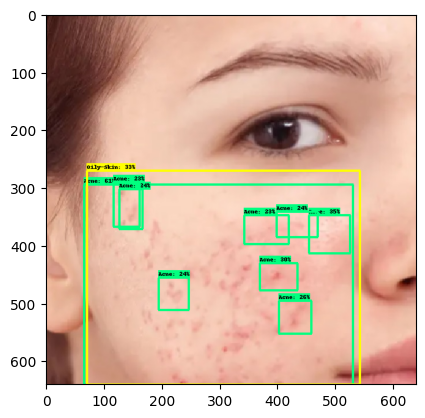

In [ ]:
# Read and convert the image to numpy array
img = cv2.imread(_IMAGE_PATH_)
image_np = np.array(img)

# Expand the image dimension and change the data type to tf.float32 then run the detection
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

# Keep only valid detections
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Draw the bounding box on the tested image
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.2,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Check the bounding box coordinates detected in the images
detections

{'detection_boxes': array([[0.46127403, 0.10248965, 1.        , 0.8305543 ],
        [0.54475105, 0.7104294 , 0.6454661 , 0.8224966 ],
        [0.42488417, 0.11017147, 1.        , 0.8496671 ],
        [0.6737492 , 0.57679194, 0.74531984, 0.6811225 ],
        [0.77550256, 0.6290515 , 0.8633628 , 0.71846384],
        [0.53547263, 0.6223563 , 0.6030482 , 0.7350465 ],
        [0.4745848 , 0.19770865, 0.5799056 , 0.2624539 ],
        [0.7139358 , 0.30410606, 0.7999615 , 0.38696927],
        [0.54513574, 0.5348906 , 0.6213225 , 0.65703183],
        [0.45542863, 0.18129055, 0.5738604 , 0.2543382 ],
        [0.93284005, 0.4235743 , 1.        , 0.5591685 ],
        [0.77097553, 0.23267931, 0.8592574 , 0.30709308],
        [0.5356316 , 0.5729642 , 0.6057741 , 0.70208895],
        [0.8211858 , 0.4710369 , 0.9060918 , 0.582011  ],
        [0.66595674, 0.3486063 , 0.7452663 , 0.43372256],
        [0.65883744, 0.5514795 , 0.7562934 , 0.6955883 ],
        [0.65631145, 0.363142  , 0.7341662 , 0.449717

# EXPORT MODEL

In [ ]:
__OUTPUT__ = os.path.join('Tensorflow', 'output')

In [ ]:
FREEZE_SCRIPT = os.path.join(objd_paths['TFAPIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command_export = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,objd_files['PIPELINE_PATH'], objd_paths['MODELDIR_PATH'], __OUTPUT__)

In [ ]:
print(command_export)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/models/pipeline.config --trained_checkpoint_dir=/content/Tensorflow/4_Class_081_Aug --output_directory=Tensorflow/output


In [ ]:
!{command_export}

2024-06-19 13:29:25.572337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:29:25.572398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:29:25.573688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 13:29:26.618784: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-19 13:29:29.494966: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating

In [ ]:
!zip -r /content/output_model.zip {__OUTPUT__}

  adding: Tensorflow/output/ (stored 0%)
  adding: Tensorflow/output/pipeline.config (deflated 69%)
  adding: Tensorflow/output/saved_model/ (stored 0%)
  adding: Tensorflow/output/saved_model/fingerprint.pb (stored 0%)
  adding: Tensorflow/output/saved_model/saved_model.pb (deflated 92%)
  adding: Tensorflow/output/saved_model/variables/ (stored 0%)
  adding: Tensorflow/output/saved_model/variables/variables.index (deflated 78%)
  adding: Tensorflow/output/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: Tensorflow/output/saved_model/assets/ (stored 0%)
  adding: Tensorflow/output/checkpoint/ (stored 0%)
  adding: Tensorflow/output/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: Tensorflow/output/checkpoint/checkpoint (deflated 42%)
  adding: Tensorflow/output/checkpoint/ckpt-0.index (deflated 80%)


In [ ]:
from google.colab import files
files.download("/content/output_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(objd_paths['TFAPIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,objd_files['PIPELINE_PATH'], _CPOINT_PATH_, '/content/Tensorflow/tflite')

In [ ]:
!{command}

2024-06-19 13:46:30.413933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:46:30.413989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:46:30.415289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 13:46:31.481288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-19 13:46:34.284978: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0619 13:47:20.472723 132

In [ ]:
!zip -r /content/tflite_model.zip /content/Tensorflow/tflite

  adding: content/Tensorflow/tflite/ (stored 0%)
  adding: content/Tensorflow/tflite/saved_model/ (stored 0%)
  adding: content/Tensorflow/tflite/saved_model/fingerprint.pb (stored 0%)
  adding: content/Tensorflow/tflite/saved_model/saved_model.pb (deflated 91%)
  adding: content/Tensorflow/tflite/saved_model/variables/ (stored 0%)
  adding: content/Tensorflow/tflite/saved_model/variables/variables.index (deflated 78%)
  adding: content/Tensorflow/tflite/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/Tensorflow/tflite/saved_model/assets/ (stored 0%)


# Last Convert Tfjs

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.5 MB/s eta 0:00:00
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 92.4 MB/s eta 0:00:00
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    